In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## ▼ Steps to Follow

import the libraries

do non graphical analysis graphical analysis

univariate analysis bivariate analysis

multivariate analysis

encode the categorical columns

check outliers and remove it if present

check skewness and remove it if present

check multicollinearity

remove multicollinearity if present

apply features scaling methods on numerical features

apply resampling methods to balance the classes (in classification problem)

also apply feature selection methods

Modelling

Cross Validation

HyperParameter Tuning

Saving the File

In [60]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [61]:
df.shape

(7043, 21)

In [62]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [63]:
df.drop('customerID', axis=1, inplace=True)
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [64]:
for i in df.columns:
    print(df[i].head())

0    Female
1      Male
2      Male
3      Male
4    Female
Name: gender, dtype: object
0    0
1    0
2    0
3    0
4    0
Name: SeniorCitizen, dtype: int64
0    Yes
1     No
2     No
3     No
4     No
Name: Partner, dtype: object
0    No
1    No
2    No
3    No
4    No
Name: Dependents, dtype: object
0     1
1    34
2     2
3    45
4     2
Name: tenure, dtype: int64
0     No
1    Yes
2    Yes
3     No
4    Yes
Name: PhoneService, dtype: object
0    No phone service
1                  No
2                  No
3    No phone service
4                  No
Name: MultipleLines, dtype: object
0            DSL
1            DSL
2            DSL
3            DSL
4    Fiber optic
Name: InternetService, dtype: object
0     No
1    Yes
2    Yes
3    Yes
4     No
Name: OnlineSecurity, dtype: object
0    Yes
1     No
2    Yes
3     No
4     No
Name: OnlineBackup, dtype: object
0     No
1    Yes
2     No
3    Yes
4     No
Name: DeviceProtection, dtype: object
0     No
1     No
2     No
3    Yes
4    

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


TotalCharges is float, but it's showing as object. Therefore we will need to change it to float

In [66]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [67]:
for i in df.columns:
    print(df[i].value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No            

Whitespace is present in TotalCharges, it needs to be replaced by mean or median.

In [68]:
df['TotalCharges'] = df['TotalCharges'].replace(' ',None)

In [69]:
df['TotalCharges'].value_counts()

20.2      11
19.75      9
20.05      8
19.9       8
19.65      8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6530, dtype: int64

In [70]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [71]:
df['TotalCharges'].dtype

dtype('float64')

In [72]:
df['TotalCharges'] = df['TotalCharges'].replace(np.nan,df['TotalCharges'].median())

In [73]:
df['TotalCharges'].value_counts()

1397.475    11
20.200      11
19.750       9
20.050       8
19.900       8
            ..
6849.400     1
692.350      1
130.150      1
3211.900     1
6844.500     1
Name: TotalCharges, Length: 6531, dtype: int64

In [74]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There is no missng value in any column

In [75]:
df['SeniorCitizen'].dtype

dtype('int64')

In [76]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


From the above observations we conclude that:
1. For tenure and MonthlyCharges columns median is greater than mean, therefore these two columns are left skewed.
2. For TotalCharges median is less than mean so distribution is right skewed.
3. There is significant difference between 75% data and max, so Outliers can be present.


# ▼ Data Visualization

## ▼ Univariate Analysis

In [77]:
categorical_col = []
numerical_col = []

for i in df.columns:
    if df.dtypes[i] == 'object':
        categorical_col.append(i)
        
    if df.dtypes[i] != 'object':
        numerical_col.append(i)
        
print(categorical_col)
print(numerical_col)
    

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [78]:
# categorical_col.remove('customerID')
categorical_col

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

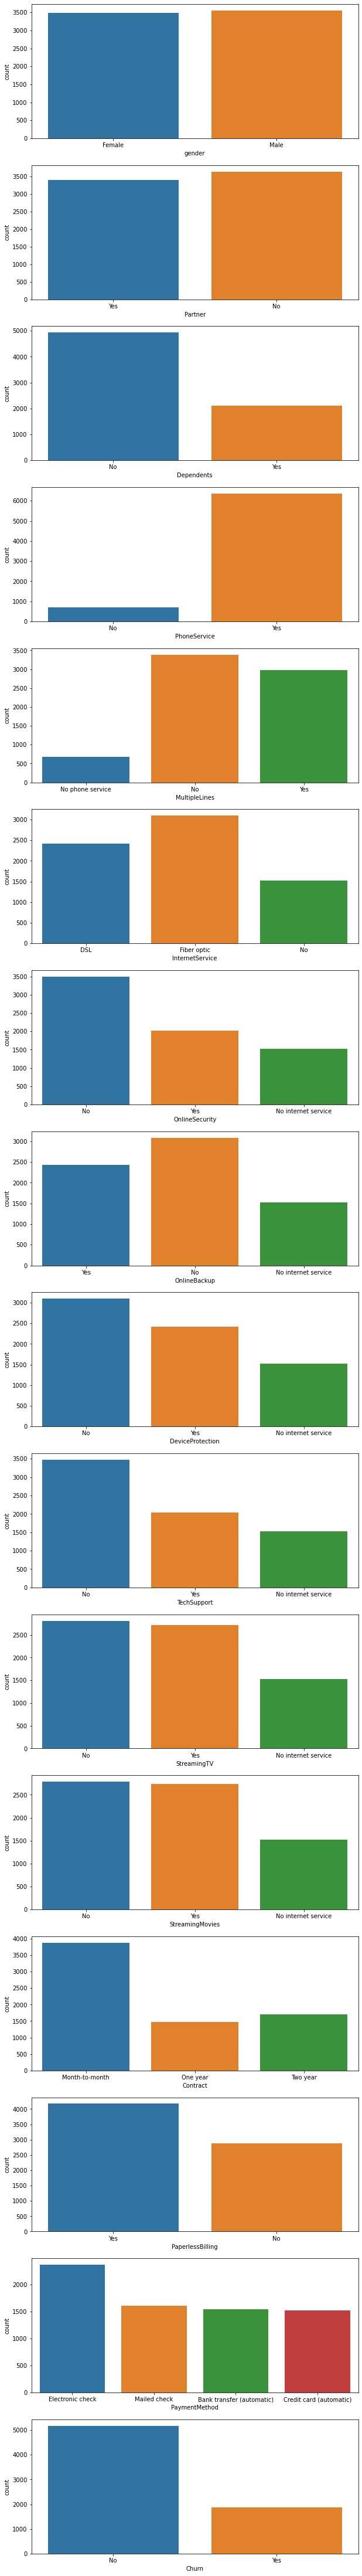

In [79]:
fig = plt.figure(figsize=(10,80))
plotno = 1
for i in categorical_col:
    plt.subplot(len(categorical_col),1,plotno)
    sns.countplot(df[i])
    plotno+=1
    


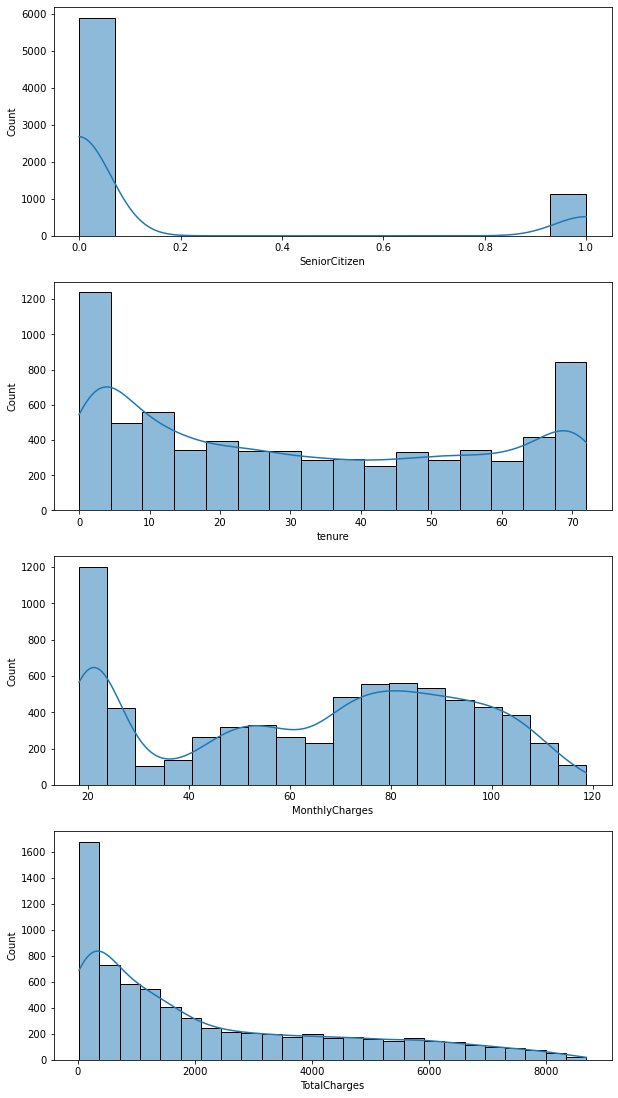

In [80]:
fig = plt.figure(figsize=(10,80))
plotno = 1
for i in numerical_col:
    plt.subplot(len(categorical_col),1,plotno)
    sns.histplot(df[i],kde=True)
    plotno+=1

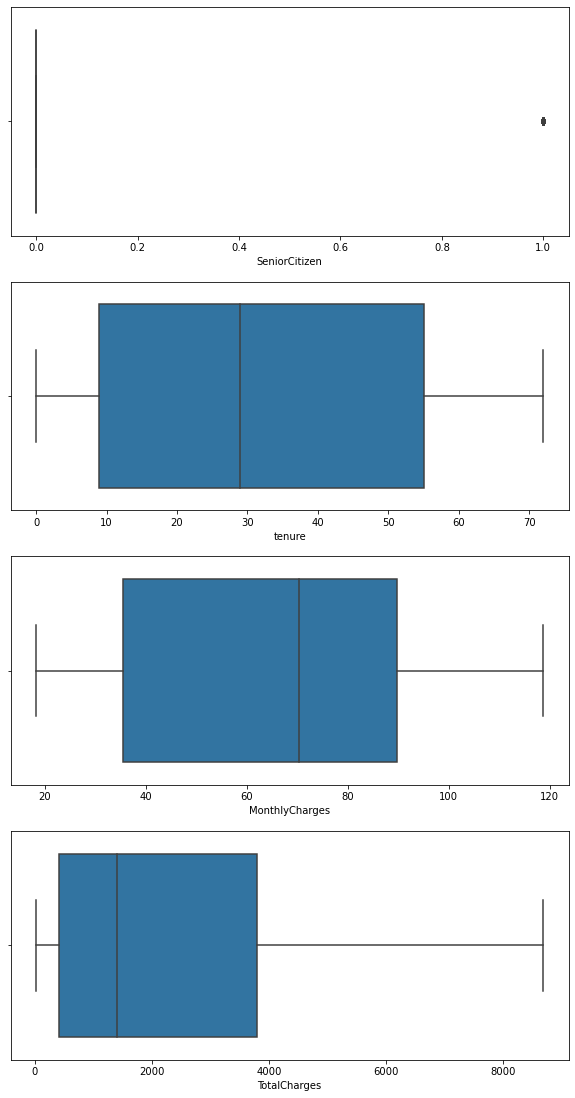

In [81]:
fig = plt.figure(figsize=(10,80))
plotno = 1
for i in numerical_col:
    plt.subplot(len(categorical_col),1,plotno)
    sns.boxplot(df[i])
    plotno+=1
    

## ▼ Checking for skewness


In [82]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.963789
dtype: float64

▼ Removing Skewness

In [83]:
df['TotalCharges'] = np.cbrt(df['TotalCharges'])

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

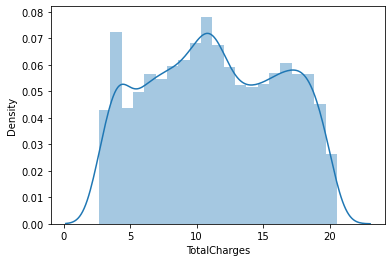

In [84]:
sns.distplot(df['TotalCharges'])

Data distribution in TotalCharges is approximately Normal distribution and the skewness is removed


## ▼ Encoding categorical column

In [85]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = oe.fit_transform(df[i].values.reshape(-1,1))

In [86]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,3.102045,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,12.362766,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,4.764407,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,12.255516,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,5.332704,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,12.579230,0.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,19.454331,0.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,7.023391,0.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,6.743066,1.0


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   float64
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   float64
 3   Dependents        7043 non-null   float64
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   float64
 6   MultipleLines     7043 non-null   float64
 7   InternetService   7043 non-null   float64
 8   OnlineSecurity    7043 non-null   float64
 9   OnlineBackup      7043 non-null   float64
 10  DeviceProtection  7043 non-null   float64
 11  TechSupport       7043 non-null   float64
 12  StreamingTV       7043 non-null   float64
 13  StreamingMovies   7043 non-null   float64
 14  Contract          7043 non-null   float64
 15  PaperlessBilling  7043 non-null   float64
 16  PaymentMethod     7043 non-null   float64


In [88]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,11.354974,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,4.895658,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,2.659006,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,7.381699,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,11.180160,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,15.586542,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,20.555116,1.000000


## ▼ Correlation between target variable and all other variable

In [89]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.002026,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.106551,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.343535,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.084094,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.869311,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.088136,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.462065,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.207178,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.246038,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.351262,-0.195525


-0.3 to +0.3- less correlation, greater than -0.5 or greater than +0.5- moderate correlation, greater than -0.7 or greater than +0.7 high correlation

<AxesSubplot:>

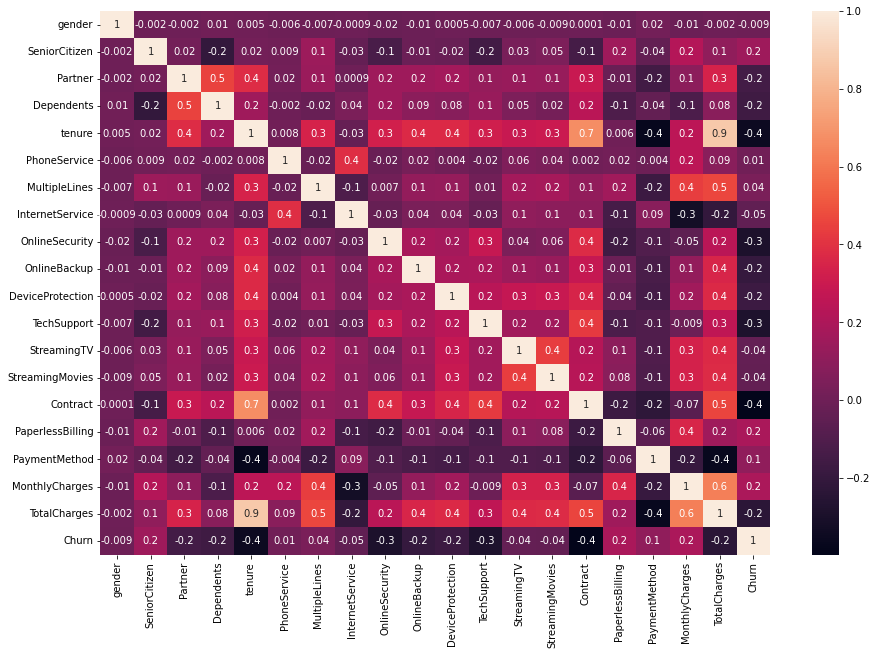

In [90]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt = '.1g')

This heatmap shows the correlation matrix by visulaizing the data. We can observe the relation between feature to feature and feature to label. This heatmap contains both positive and negative correlation
1) There is no much positive correlation between the target and features.

2) The column MonthlyCharges, Paperless Billing, Senior Citizen and Payment Method have positive correlation with the Label Column "Churn".

3) The label is negatively correlated with Contract, tenure, OnlineSecurity, TechSupport, TotalCharges, Device Protection, OnlineBackup, Partner and Dependents.

4) Also the column gender has very correlation with the label, we can drop it if necessary.

5) The column TotalCharges and tenure, Contract and tenure, TotalCharge and MonthlyCharges and many other columns have high correlation with each other.


In [91]:
df.corr()['Churn'].sort_values (ascending = False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.233425
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

&darr; separating Target variable and independent features

In [92]:
x= df.drop('Churn',axis=1)
y=df['Churn']

## ▼ feature scaling using Standard Scaler

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)


In [94]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-1.685885
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,0.205869
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.346302
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,0.183960
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.230212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,0.250087
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533,1.654513
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.884843
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338,-0.942107


We have scaled the data using Standard Scalarization method to overcome the issue of biasness.

## ▼ Checking Variance Inflation Factor(VIF)

In [95]:
#Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor (x.values, i) for i in range(len(x.columns))] 
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.001694,gender
1,1.149694,SeniorCitizen
2,1.462892,Partner
3,1.383773,Dependents
4,12.767881,tenure
5,1.622418,PhoneService
6,1.398163,MultipleLines
7,1.871514,InternetService
8,1.256319,OnlineSecurity
9,1.192573,OnlineBackup


By checking VIF values we can find the features causing multicollineraity problem. Here we can find the feature TotalCharges and tenure have VIF value greater than 10 which means they have high correlation with other features. We will drop one of the column first, if the same issue exist then we will try to remove the column having high VIF.

In [96]:
# Dropping TotalCharges column
x.drop("TotalCharges", axis= 1, inplace = True)

Again checking VIF value to confirm whether the multicollinearity still exists or not

In [97]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor (x.values, i) for i in range(len(x.columns))] 
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.001684,gender
1,1.149639,SeniorCitizen
2,1.460856,Partner
3,1.382106,Dependents
4,2.754468,tenure
5,1.622282,PhoneService
6,1.391652,MultipleLines
7,1.825876,InternetService
8,1.247696,OnlineSecurity
9,1.185932,OnlineBackup


So, we have solved multicolinearity issue. We can now move ahead for model building.

In [98]:
y.value_counts()

0.0    5174
1.0    1869
Name: Churn, dtype: int64

Here we can see that the data is not balanced, since it is a classification problem we will balance the data using oversampling method.

## ▼Oversampling

In [99]:
# Oversampling the data
!pip install imblearn
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x, y)

In [100]:
y.value_counts()

0.0    5174
1.0    1869
Name: Churn, dtype: int64

In [101]:
y1.value_counts()

0.0    5174
1.0    5174
Name: Churn, dtype: int64

Now the data is balanced. Now we can build machine learning classification models.
Modelling

# ▼ Modelling

## ▼ Finding the best random state

In [102]:
from sklearn.model_selection import train_test_split
from sklearn. ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu= 0
maxRS = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = i) 
    RFR =  RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score (y_test, pred)
    if acc>maxAccu:
        maxAccu= acc
        maxRS = i
print("Best accuracy is ", maxAccu, "at random_state", maxRS)

Best accuracy is  0.8676328502415459 at random_state 141


## ▼ Creating train test split

In [103]:
x_train,x_test,y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = maxRS)

▼ Importing library for Classification Algorithms

In [104]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier 
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score 
from sklearn.model_selection import cross_val_score

▼RandomForestClassifier

In [105]:
# Checking accuracy for RandomForestClasifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score (y_test, predRFC))
print(confusion_matrix (y_test, predRFC))
print(classification_report (y_test, predRFC))

0.7770941788925698
[[1388  168]
 [ 303  254]]
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85      1556
         1.0       0.60      0.46      0.52       557

    accuracy                           0.78      2113
   macro avg       0.71      0.67      0.69      2113
weighted avg       0.76      0.78      0.77      2113



The accuracy score using RandomForestClassifier is 77%.

▼ LogisticRegression

In [106]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print(accuracy_score (y_test, predLR))
print(confusion_matrix (y_test, predLR)) 
print(classification_report (y_test, predLR))

0.7969711310932324
[[1386  170]
 [ 259  298]]
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87      1556
         1.0       0.64      0.54      0.58       557

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



The accuracy score using LogisticRegression is 79%

▼ Support Vector Classifier

In [107]:
svc = SVC()
svc.fit(x_train, y_train)
predsvc = svc. predict (x_test)
print (accuracy_score (y_test, predsvc))
print (confusion_matrix (y_test, predsvc))
print(classification_report (y_test, predsvc))

0.7893989588263133
[[1406  150]
 [ 295  262]]
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      1556
         1.0       0.64      0.47      0.54       557

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.70      2113
weighted avg       0.78      0.79      0.78      2113



The accuracy score using Support Vector Machine Classifier is 81.48%.

▼ Gradient Boosting Classifier

In [108]:
GB = GradientBoostingClassifier()
GB.fit(x_train, y_train)
predGB = GB.predict(x_test)
print (accuracy_score (y_test, predGB))
print (confusion_matrix (y_test, predGB))
print(classification_report (y_test, predGB))

0.7979176526265973
[[1398  158]
 [ 269  288]]
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1556
         1.0       0.65      0.52      0.57       557

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



The accuracy score using GradientBoostingClassifier is 79%

▼ AdaBoost Classifier

In [109]:
ABC = AdaBoostClassifier()
ABC.fit(x_train, y_train)
predABC = ABC.predict(x_test)
print (accuracy_score (y_test, predABC))
print (confusion_matrix (y_test, predABC))
print(classification_report (y_test, predABC))

0.7993374349266446
[[1389  167]
 [ 257  300]]
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87      1556
         1.0       0.64      0.54      0.59       557

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



The accuracy score using Support Vector Machine Classifier is 79%

▼ Bagging Classifier

In [111]:
BC = BaggingClassifier()
BC.fit(x_train, y_train)
predBC = BC.predict(x_test)
print (accuracy_score (y_test, predBC)) 
print(confusion_matrix(y_test, predBC)) 
print(classification_report (y_test, predBC))

0.7695220066256507
[[1377  179]
 [ 308  249]]
              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85      1556
         1.0       0.58      0.45      0.51       557

    accuracy                           0.77      2113
   macro avg       0.70      0.67      0.68      2113
weighted avg       0.76      0.77      0.76      2113



The accuracy score using BaggingClassifier is 76%

▼ ExtraTrees Classifier

In [130]:
ET = ExtraTreesClassifier()
ET.fit(x_train, y_train)
predET = ET.predict(x_test)
print (accuracy_score (y_test, predET)) 
print(confusion_matrix(y_test, predET)) 
print(classification_report (y_test, predET))

0.7685754850922859
[[1364  192]
 [ 297  260]]
              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85      1556
         1.0       0.58      0.47      0.52       557

    accuracy                           0.77      2113
   macro avg       0.70      0.67      0.68      2113
weighted avg       0.76      0.77      0.76      2113



The accuracy score using ExtraTreesClassifier is 76%

## ▼Cross validation Score 

Syntax:

cross_val_score (modelname, features, targetvariable, cv-foldvalue, scoring= 'accuracy')

In classification algorithms- default scoring parameter- accuracy for regression- deafulat scoring parameter is r2 score

In [113]:
# Checking cv score for Random Forest Classifier
score = cross_val_score (RFC,x1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is", accuracy_score (y_test, predRFC) - score.mean())

[0.77536232 0.78695652 0.88985507 0.89753504 0.90961817]
0.8518654254313154
Difference between Accuracy score and cross validation score is -0.07477124653874556


In [114]:
# Checking cv score for Logistic Regression
score = cross_val_score (LR, x1, y1)
print(score)
print(score.mean())
-0.05132106026301919
print("Difference between Accuracy score and cross validation score is", accuracy_score (y_test, predLR) - score.mean())

[0.77149758 0.75942029 0.77681159 0.78443693 0.79555341]
0.7775439604186951
Difference between Accuracy score and cross validation score is 0.019427170674537253


In [115]:
# Checking cv score for Gradient Boosting Classifier
score = cross_val_score (GB, x1, y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score (y_test, predGB) - score.mean())

[0.75217391 0.78309179 0.86956522 0.88013533 0.88545191]
0.834083631617412
Difference between Accuracy score and cross validation score is - -0.03616597899081464


In [116]:
# Checking cv score for Support Vector Machine Classifier
score = cross_val_score (svc, x, y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score (y_test, predsvc) - score.mean())

[0.79914833 0.80411639 0.78424414 0.79971591 0.80113636]
0.7976722288534744
Difference between Accuracy score and cross validation score is -  -0.008273270027161161


In [117]:
# Checking cv score for AdaBoosting Classifier
score = cross_val_score (ABC, x, y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score (y_test, predABC) - score.mean())

[0.81121363 0.80482612 0.79914833 0.80539773 0.80752841]
0.8056228426027486
Difference between Accuracy score and cross validation score is -  -0.006285407676104082


In [118]:
# Checking cv score for Bagging Classifier
score = cross_val_score(BC, x, y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is", accuracy_score (y_test, predBC) - score.mean())

[0.77146913 0.77714691 0.761533   0.75639205 0.79261364]
0.7718309447383702
Difference between Accuracy score and cross validation score is -0.002308938112719483


In [119]:
#Checking cv score for Extra Trees Classifier
score = cross_val_score (ET, x1, y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ", accuracy_score (y_test, predET) - score.mean())

[0.80869565 0.80869565 0.89371981 0.90575157 0.9062349 ]
0.8646195156006659
Difference between Accuracy score and cross validation score is -  -0.09036490130819075


Extra Trees Classifier is our best model as the difference between accuracy score and cross validation score is least.

Extra Trees Classifier is our best Model

## ▼ Hyper Parameter Tuning

In [120]:
# ExtraTrees Classifier

from sklearn.model_selection import GridSearchCV
parameters = {'criterion': ['gini', 'entropy'],
                'random_state' : [10, 50, 1000],
                'max_depth' : [0, 10, 20],
                'n_jobs' : [-2, -1, 1],
                'n_estimators' : [50, 100, 200, 300]}

In [121]:
GCV = GridSearchCV(ExtraTreesClassifier(), parameters, cv = 5)

In [122]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [123]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 1000}

In [124]:
Final_model = ExtraTreesClassifier(criterion = 'entropy', max_depth = 10, n_estimators = 100, n_jobs = -2, random_state = 1000)
                                   
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score (y_test, pred)
print(acc*100)

84.7987117552335


▼ Plotting ROC and compare AUC for all the models used

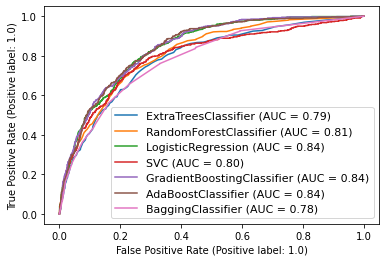

In [126]:
# Plotting for all the models used here
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection 
from sklearn.metrics import plot_roc_curve

# ax_=Axes with confusion matrix
disp = plot_roc_curve(ET,x_test,y_test)    

plot_roc_curve (RFC, x_test, y_test, ax = disp.ax_)
plot_roc_curve (LR, x_test, y_test, ax = disp.ax_) 
plot_roc_curve(svc, x_test, y_test, ax = disp.ax_) 
plot_roc_curve (GB, x_test, y_test, ax = disp.ax_) 
plot_roc_curve (ABC, x_test, y_test, ax = disp.ax_) 
plot_roc_curve (BC, x_test, y_test, ax = disp.ax_)
plt.legend(prop={'size':11}, loc = 'lower right')
plt.show()

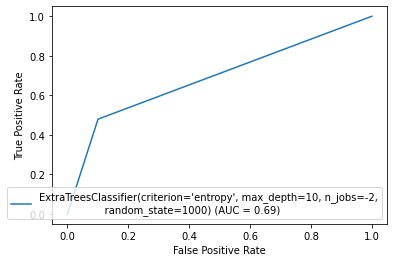

In [128]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve (y_test, pred)
roc_auc = metrics. auc (fpr, tpr)
display = metrics. RocCurveDisplay (fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=Final_model) 
display.plot()

Here we have plotted the ROC curve for the final model and the AUC value for the best model is 94%.

## ▼ Saving the model

In [131]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_model, "Telecom_Customer_Churn_Analysis.pkl")


['Telecom_Customer_Churn_Analysis.pkl']

## ▼ Predicting the saved model

In [133]:
# Lets load the saved model and get the predictions
model = joblib.load("Telecom_Customer_Churn_Analysis.pkl")
# Prediction
prediction = model.predict(x_test)
prediction

array([0., 0., 0., ..., 0., 1., 0.])

These are the predicted churned values of the customers.

In [134]:
# Prediction

a = np.array(y_test)
df = pd.DataFrame()
df["Predicted"] = prediction
df["Original"] = a
df

,Predicted,Original
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,1.0,1.0
4,0.0,0.0
...,...,...
2108,0.0,0.0
2109,0.0,0.0
2110,0.0,0.0
2111,1.0,0.0
